In [2]:
import scipy.optimize as optimize
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from numpy import random

In [3]:
# Raw Dataframe
df = pd.DataFrame(
    {'Time' : [22, 22, 22, 22, 22, 22, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
     'ul' : [3, 2, 3, 2, 1, 1, 5, 5, 4, 4, 4, 4, 4, 5, 3, 5, 7, 6, 6, 6, 6, 7, 7, 5, 5, 6, 8, 8, 9, 10, 9, 11, 10, 9, 8, 9]}
)
df


,Time,ul
0,22,3
1,22,2
2,22,3
3,22,2
4,22,1
5,22,1
6,44,5
7,44,5
8,44,4
9,44,4


In [4]:

# Getting mean values for datapoints
df_calc = df.groupby('Time').mean().reset_index()
df_calc = df_calc.sort_values('ul', ascending=True)
df_calc

,Time,ul
0,22,2.0
1,44,4.3
2,52,6.1
3,60,9.1


In [5]:
x, y = df_calc['ul'], df_calc['Time']

In [6]:
#This equation is used to determine the relationship of how ul is related to time (x = ul, y = time)

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.55051 * x + -0.74653 * x^2 + -1.73702


In [7]:
# Equation to determine 8 ul
def waterfunction(x):
    y = 13.55051 * x + -0.74653 * x ** 2 + -1.73702
    return(y)

In [8]:
waterfunction(4)

40.52054

In [9]:
# Determine the time for 8 ul and put it in the dataframe

df_calc.loc[3, 'Time'] = waterfunction(8)
df_calc.loc[3, 'ul'] = 8
df_calc

,Time,ul
0,22.00000,2.0
1,44.00000,4.3
2,52.00000,6.1
3,58.88914,8.0


In [10]:
# Come up wiht a new equation where Time is x now and ul is y

x, y = df_calc['ul'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.94674 * x + -0.79141 * x^2 + -2.43169


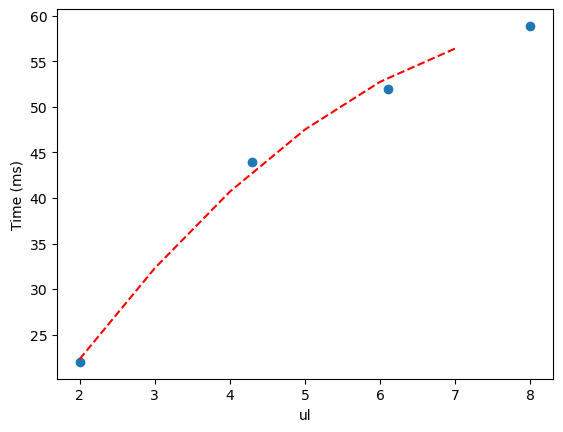

In [11]:
# Graph the equation

x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [12]:
df_calc['ul Opposite'] = [8, 6.1, 4.3, 2]
df_calc

,Time,ul,ul Opposite
0,22.00000,2.0,8.0
1,44.00000,4.3,6.1
2,52.00000,6.1,4.3
3,58.88914,8.0,2.0


In [13]:
x1, y1 = df_calc['ul Opposite'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x1, y1)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 4.57457 * x + -1.05457 * x^2 + 53.50447


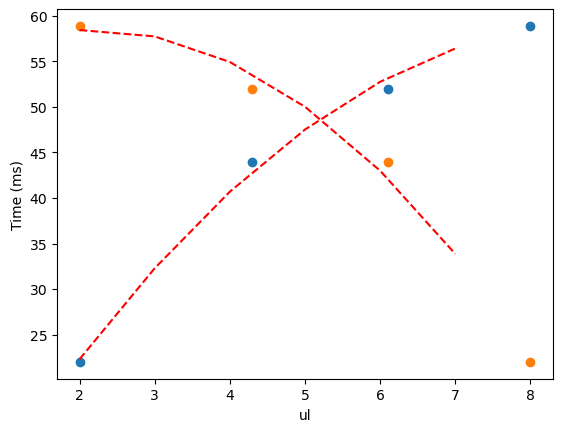

In [14]:
x1_line = arange(min(x1), max(x1), 1)
y1_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.plot(x1_line, y1_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.scatter(x = 'ul Opposite', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [15]:
## Solving where they cross each other

from sympy import symbols, Eq, solve

# Define the symbols and equations
x, y = symbols('x y')
eq1 = Eq(y, 0.26026 * x + -0.00522 * x**2 + 4.79342)
eq2 = Eq(y, -0.15112 * x + 0.00388 * x**2 + 3.44460)

# Solve the system of equations
sol = solve((eq1, eq2), (x, y))

# Print the solution
print(sol)


[(-3.07024999129229, 3.94515074651913), (48.2768433978857, 5.19193942655176)]


In [16]:
new_row = {'Time': 48.2768433978857, 'ul': 5.19193942655176, 'ul Opposite': None}

df_calc = pd.concat([df_calc.loc[:1], pd.DataFrame([new_row]), df_calc.loc[2:]], ignore_index=True)

In [17]:
df_calc

,Time,ul,ul Opposite
0,22.000000,2.000000,8.0
1,44.000000,4.300000,6.1
2,48.276843,5.191939,NaN
3,52.000000,6.100000,4.3
4,58.889140,8.000000,2.0


In [18]:
df_calc['(F-R)/(F+R)'] = [-1, None, 0, None, 1]

In [19]:
df_calc

,Time,ul,ul Opposite,(F-R)/(F+R)
0,22.000000,2.000000,8.0,-1.0
1,44.000000,4.300000,6.1,NaN
2,48.276843,5.191939,NaN,0.0
3,52.000000,6.100000,4.3,NaN
4,58.889140,8.000000,2.0,1.0


In [20]:
df_calc = df_calc.dropna(subset=['(F-R)/(F+R)'])

x2, y2 = df_calc['(F-R)/(F+R)'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x2, y2)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 18.44457 * x + -7.83227 * x^2 + 48.27684


/Users/rajharsora/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [21]:
df_calc

,Time,ul,ul Opposite,(F-R)/(F+R)
0,22.000000,2.000000,8.0,-1.0
2,48.276843,5.191939,NaN,0.0
4,58.889140,8.000000,2.0,1.0


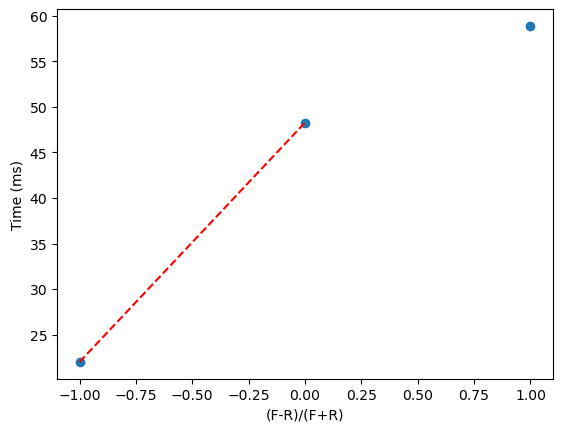

In [22]:
x2_line = arange(min(x2), max(x2), 1)
y2_line = objective(x2_line, a, b, c)

plt.plot(x2_line, y2_line, '--', color='red')
plt.scatter(x = '(F-R)/(F+R)', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("(F-R)/(F+R)")
plt.show()

# The Real Equations and Graphs

In [23]:
x = df_calc['(F-R)/(F+R)']
y = df_calc['Time']

p = np.polyfit(x, y, 2)

print(f'The equation is Time = {p[0]:.2f} * (F-R)/(F+R)**2 + {p[1]:.2f} * (F-R)/(F+R) + {p[2]:.2f}')

The equation is Time = -7.83 * (F-R)/(F+R)**2 + 18.44 * (F-R)/(F+R) + 48.28


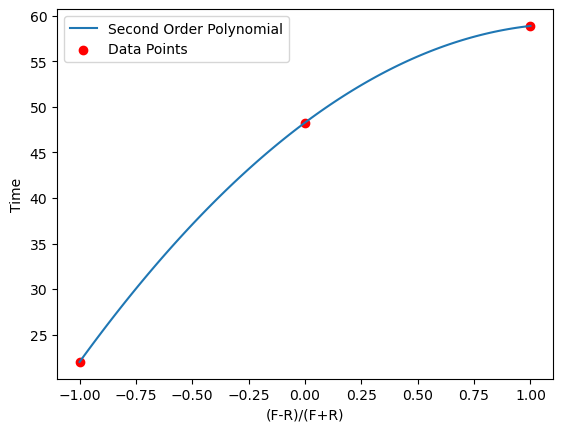

In [24]:
x = df_calc['(F-R)/(F+R)']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the curve and the data points
plt.plot(x_range, y_range, label='Second Order Polynomial')
plt.scatter(x, y, color='red', label='Data Points')

# Add axis labels and a legend
plt.xlabel('(F-R)/(F+R)')
plt.ylabel('Time')
plt.legend()

# Show the plot
plt.show()


In [25]:
reversed_ratios = [1.0, 0.0, -1.0]

reversed_ratios = df_calc['reversed_ratios'] 
df_calc

KeyError: 'reversed_ratios'

In [ ]:
x = df_calc['reversed_ratios']
y = df_calc['Time']

p = np.polyfit(x, y, 2)

print(f'The equation is Time = {p[0]:.2f} * (F-R)/(F+R)**2 + {p[1]:.2f} * (F-R)/(F+R) + {p[2]:.2f}')

The equation is Time = -7.83 * (F-R)/(F+R)**2 + -18.44 * (F-R)/(F+R) + 48.28


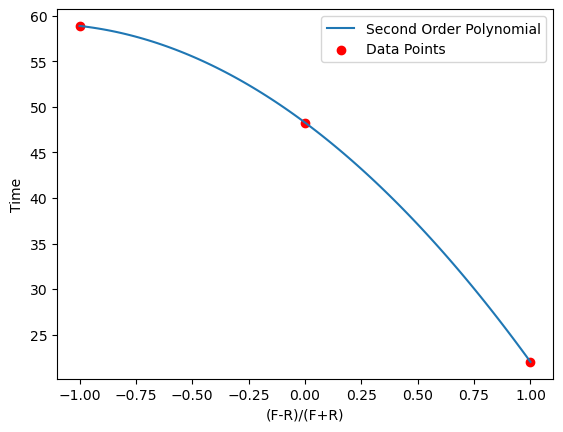

In [ ]:
x = df_calc['reversed_ratios']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the curve and the data points
plt.plot(x_range, y_range, label='Second Order Polynomial')
plt.scatter(x, y, color='red', label='Data Points')

# Add axis labels and a legend
plt.xlabel('(F-R)/(F+R)')
plt.ylabel('Time')
plt.legend()

# Show the plot
plt.show()

# Final

The Final Graph looks like this:

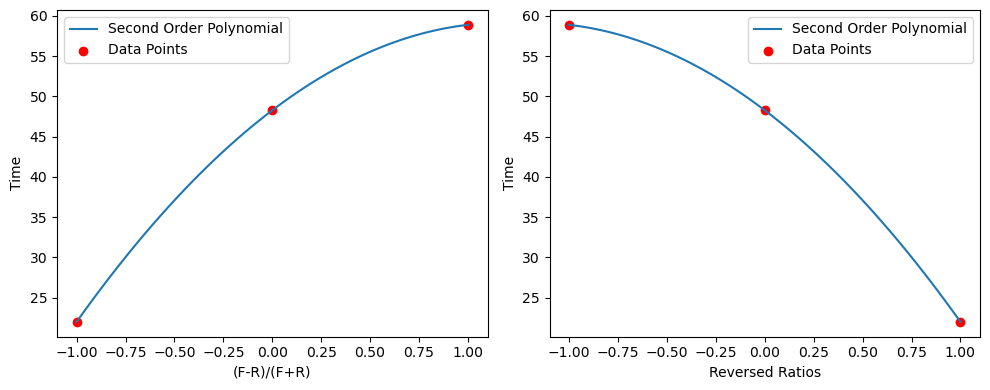

In [ ]:
x = df_calc['(F-R)/(F+R)']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Create a subplot with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph in the first column
axs[0].plot(x_range, y_range, label='Second Order Polynomial')
axs[0].scatter(x, y, color='red', label='Data Points')
axs[0].set_xlabel('(F-R)/(F+R)')
axs[0].set_ylabel('Time')
axs[0].legend()

# Create the second plot
x = df_calc['reversed_ratios']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the curve and the data points in the second column
axs[1].plot(x_range, y_range, label='Second Order Polynomial')
axs[1].scatter(x, y, color='red', label='Data Points')
axs[1].set_xlabel('Reversed Ratios')
axs[1].set_ylabel('Time')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


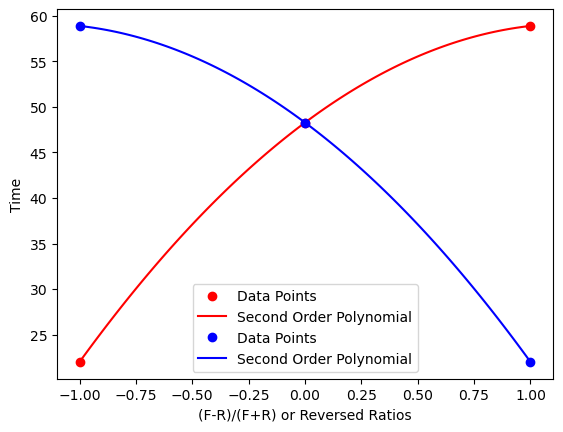

In [ ]:
# Create the first plot
x = df_calc['(F-R)/(F+R)']
y = df['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the first graph
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_range, y_range, 'r-', label='Second Order Polynomial')

# Create the second plot
x = df_calc['reversed_ratios']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for reversed_ratios
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the second graph
plt.plot(x, y, 'bo', label='Data Points')
plt.plot(x_range, y_range, 'b-', label='Second Order Polynomial')

# Add axis labels and a legend
plt.xlabel('(F-R)/(F+R) or Reversed Ratios')
plt.ylabel('Time')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Define the possible values
values = ["push", "pull"]

# Generate the array of 400 indexes with random values
array = [random.choice(values) for i in range(10)]

# Print the array
print(array)


['pull', 'push', 'pull', 'push', 'push', 'push', 'push', 'pull', 'pull', 'push']


In [ ]:
import pandas as pd

# Define the array
arr = ['pull', 'push', 'pull', 'push', 'push', 'push', 'push', 'pull', 'pull', 'push']

# Define the initial values for F and R
F = 0
R = 0

# Define a list to store the time values
times = []

# Loop through the array and calculate the time values
for i in range(len(arr)):
    if F+R == 0:
        time = 0
    elif arr[i] == 'pull':
        time = -7.83 * (F-R)/(F+R)**2 + 18.44 * (F-R)/(F+R) + 48.28
        R += 1
    else:
        time = -7.83 * (F-R)/(F+R)**2 - 18.44 * (F-R)/(F+R) + 48.28
        F += 1
    times.append(time)

# Create a Pandas DataFrame with the array and time values
df = pd.DataFrame({'pull_push': arr, 'time': times})

# Print the DataFrame
print(df)


  pull_push  time
0      pull     0
1      push     0
2      pull     0
3      push     0
4      push     0
5      push     0
6      push     0
7      pull     0
8      pull     0
9      push     0


In [ ]:
def push_equation1(F,R):
    time = -7.83 * (F-R)/(F+R)**2 - 18.44 * (F-R)/(F+R) + 48.28
    return(time)

def pull_equation2(F,R):
    time = -7.83 * (F-R)/(F+R)**2 + 18.44 * (F-R)/(F+R) + 48.28
    return(time)

In [ ]:
push_equation1(1,0)

22.009999999999998

In [ ]:
import pandas as pd

# Define the array
arr = ['pull', 'push', 'pull', 'push', 'push', 'push', 'push', 'pull', 'pull', 'push']

# Define the initial values for F and R
F = 0
R = 0

# Define a list to store the time values
times = []

# Loop through the array and calculate the time values
for i in range(len(arr)):
    if arr[i] == 'pull':
        time = -7.83 * (F-R)/(F+R+1)**2 + 18.44 * (F-R)/(F+R+1) + 48.28
        R += 1
    else:
        time = -7.83 * (F+1-R)/(F+R+1)**2 - 18.44 * (F+1-R)/(F+R+1) + 48.28
        F += 1
    times.append(time)

# Create a Pandas DataFrame with the array and time values
df = pd.DataFrame({'pull_push': arr, 'time': times})

# Print the DataFrame
print(df)


  pull_push       time
0      pull  48.280000
1      push  48.280000
2      pull  48.280000
3      push  48.280000
4      push  44.278800
5      push  41.698333
6      push  39.897755
7      pull  54.827969
8      pull  52.184444
9      push  44.435400


## The Equations + Testing

In [ ]:
def pull_equation(F,R):
    time = -7.83 * (F-R)/(F+R+1)**2 + 18.44 * (F-R)/(F+R+1) + 48.28
    return(time)

In [ ]:
def push_equation(F,R):
    time = -7.83 * (F+1-R)/(F+R+1)**2 - 18.44 * (F+1-R)/(F+R+1) + 48.28
    return(time)

In [ ]:
# Mouse decides to start with 7 pushes

push_equation(7,0)

28.86125

In [ ]:
# Now it does a pull

pull_equation(7,1)

59.99333333333334

In [ ]:
push_equation(3,3)

45.48591836734694

In [ ]:
push_equation(1,0)

25.925

In [ ]:
pull_equation(1,1)

48.28

In [ ]:
push_equation(2,1)

38.08125

In [ ]:
push_equation(3,1)

36.276399999999995

In [ ]:
push_equation(4,1)

35.11666666666667

In [ ]:
pull_equation(4,2)

53.22897959183673